<a href="https://colab.research.google.com/github/Vivek-afk81/data_mining/blob/main/penguins_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
# Change to a specific directory
os.chdir('/content/drive/My Drive/data_mining/data')

# Verify current directory
print(os.getcwd())

/content/drive/My Drive/data_mining/data


###Install And Import Libraries

This demonstration requires the palmerpenguins library

In [4]:
!pip install palmerpenguins

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from palmerpenguins import load_penguins

###Load and prepare data

Following steps are used to prepare the data:

1. Load the penguins dataset in variable df
2. Remove the island, year , and sex variables
3. Rename the class variable species as y
4. Drop all rows with NaN
5. Display the first 5 rows of df

In [8]:
df=load_penguins()
df=df.drop(['island','year','sex'],axis=1)\
        .dropna()\
        .rename(columns={'species':'y'})
df.head()


,y,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0


###Explore the data

Visualize various aspects of penguins dataset.

####Bar Plot of Class Variable
Use Seaborn's countplot function to create a bar plot and look at the distribution of different species

/tmp/ipython-input-1065433928.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y',data=df,palette=['red','green','blue'])


<Axes: xlabel='y', ylabel='count'>

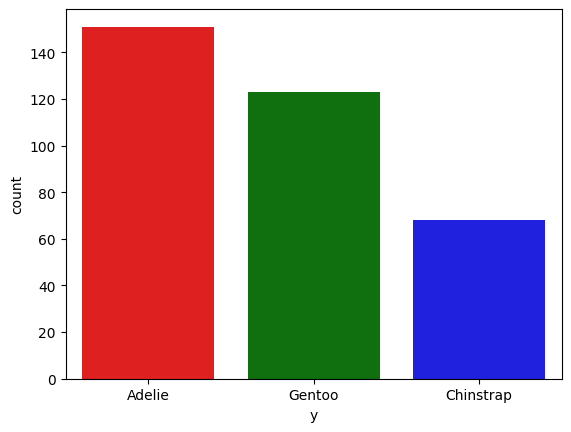

In [11]:
sns.countplot(x='y',data=df,palette=['red','green','blue'])

####Scatter Plots and Density Plots for Feature Pairs
Plot the relationships between all features using PairGrid . In particular, notice how bill_length_mm and bill_depth_mm variables are good at
distinguishing between the species.

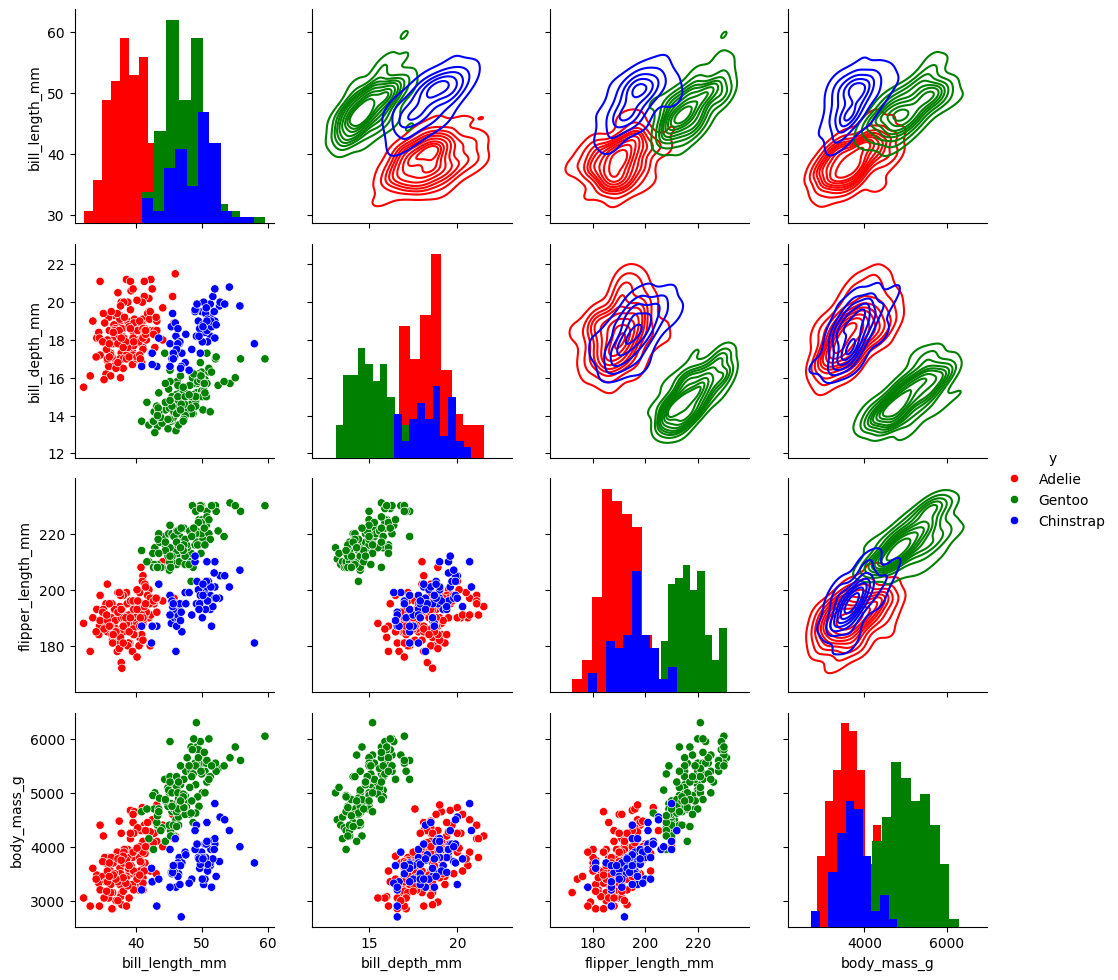

In [12]:
# Creates a grid using Seaborn's PairGrid()
g = sns.PairGrid(
    df,
    vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'],
    hue='y',
    diag_sharey=False,
    palette=["red", "green", "blue"]
)
# Adds histograms on the diagonal
g.map_diag(plt.hist)

# Adds density plots above the diagonal
g.map_upper (sns.kdeplot)

# Adds scatterplots below the diagonal
g.map_lower(sns.scatterplot)

# Adds a legend
g.add_legend()

###Save Data

save the data as a csv file


In [14]:
df.to_csv('penguins.csv',sep=',',index=False)